In [62]:
import numpy as np
from skimage import io
from skimage import color
from matplotlib import pyplot as plt

In [63]:
def nbhd(pt,checked,dims):                  #defining neighbourhood of a point
  nbhd=[]
                                            #Including only those points which are not accepted into the growing region
  imin = max(pt[0]-1, 0)
  imax = min(pt[0]+1, dims[0]-1)
  jmin = max(pt[1]-1, 0)
  jmax = min(pt[1]+1, dims[1]-1)

  i=imin

  while(i<imax+1):
    j=jmin
    while(j<jmax+1):
      if checked[i][j]==False:
        nbhd.append((i,j))
      j=j+1
    i=i+1
    
  return nbhd         

In [64]:
def grow(img,seed,t):
  
  #img - image to be segmented
  #seed
  #t - neighbourhood radius to be considered
  # starting with single pixels

  seg=np.zeros(img.shape,dtype=bool)     # tracks segmented image
  checked=np.zeros_like(seg)             # tracks those points which are accepted into the growing region

  seg[seed]=True
  checked[seed]=True
  needs_check=nbhd(seed,checked,img.shape)  #points to be examined
  

  
  while(len(needs_check)>0):        # when all points are examined

    pt=needs_check.pop()            

    if checked[pt]==True:continue

    checked[pt]=True

    #neighbours
    imin = max(pt[0]-t, 0)
    imax = min(pt[0]+t, img.shape[0]-1)
    jmin = max(pt[1]-t, 0)
    jmax = min(pt[1]+t, img.shape[1]-1)

    if img[pt] >= img[imin:imax+1, jmin:jmax+1].mean() :  # checking the acceptance condition
      # Include the pixel in the segmentation and
      # add its neighbors to be checked.
      seg[pt] = True
      needs_check += nbhd(pt, checked,img.shape)    # Updating the set of points to be examined
    

  return seg


In [65]:
img=io.imread('/content/drive/MyDrive/Images/test.png')
grayscale=color.rgb2gray(img)

In [66]:
img.shape

(1955, 1532, 3)

In [67]:
segmented=grow(grayscale,(1000,800),5)

(-0.5, 1531.5, 1954.5, -0.5)

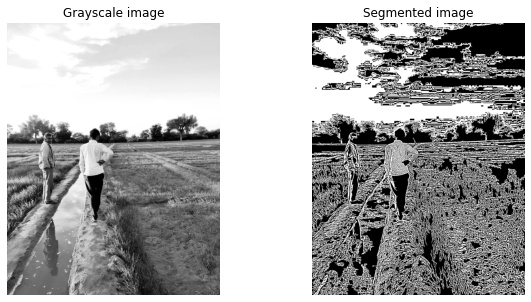

In [68]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(grayscale,cmap=plt.cm.gray)
plt.title('Grayscale image')
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(segmented,cmap=plt.cm.gray)
plt.title('Segmented image')
plt.axis('off')